# Simple Linear Regression

In this notebook, we'll build a linear regression model to predict `Sales` using an appropriate predictor variable.

## Step 1: Reading and Understanding the Data

Let's start with the following steps:

1. Importing data using the pandas library
2. Understanding the structure of the data

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the numpy and pandas package

import numpy as np
import pandas as pd
import sklearn

In [3]:
# Read the given CSV file, and view some sample records

advertising = pd.read_csv("advertising.csv")
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


Let's inspect the various aspects of our dataframe

In [4]:
advertising.shape

(200, 4)

In [5]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


## Step 2: Visualising the Data

Let's now visualise our data using seaborn. We'll first make a pairplot of all the variables present to visualise which variables are most correlated to `Sales`.

In [8]:
import matplotlib.pyplot as plt 
import seaborn as sns

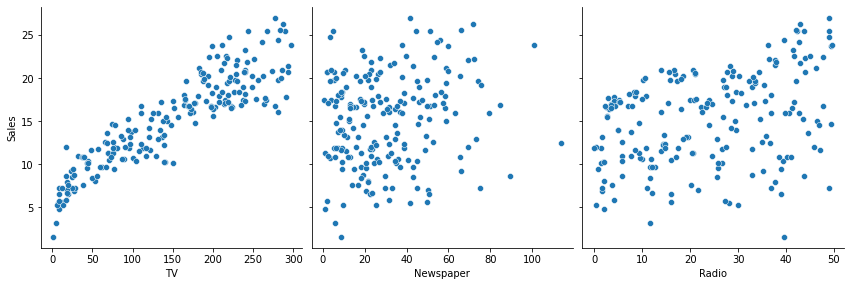

In [9]:
sns.pairplot(advertising, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales',size=4, aspect=1, kind='scatter')
plt.show()

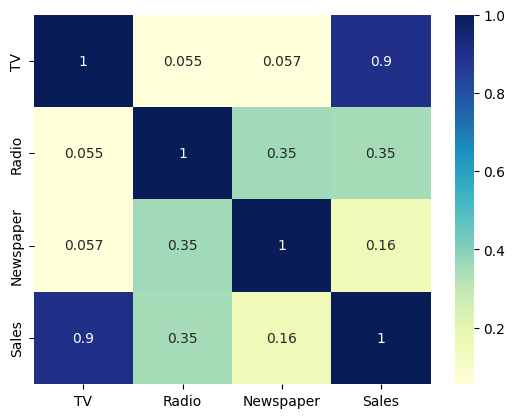

In [10]:
sns.heatmap(advertising.corr(), cmap="YlGnBu", annot = True)
plt.show()

As is visible from the pairplot and the heatmap, the variable `TV` seems to be most correlated with `Sales`. So let's go ahead and perform simple linear regression using `TV` as our feature variable.

---
## Step 3: Performing Simple Linear Regression

Equation of linear regression<br>
$y = c + m_1x_1 + m_2x_2 + ... + m_nx_n$

-  $y$ is the response
-  $c$ is the intercept
-  $m_1$ is the coefficient for the first feature
-  $m_n$ is the coefficient for the nth feature<br>

In our case:

$y = c + m_1 \times TV$

The $m$ values are called the model **coefficients** or **model parameters**.

---

### Linear Regression using `linear_model` in `sklearn`

Apart from `statsmodels`, there is another package namely `sklearn` that can be used to perform linear regression. We will use the `linear_model` library from `sklearn` to build the model. Since, we hae already performed a train-test split, we don't need to do it again.

There's one small step that we need to add, though. When there's only a single feature, we need to add an additional column in order for the linear regression fit to be performed successfully.

In [12]:
X = advertising['TV']
y = advertising['Sales']

In [13]:
from sklearn.model_selection import train_test_split
X_train_lm, X_test_lm, y_train_lm, y_test_lm = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 100)

In [14]:
X_train_lm.shape

(160,)

In [15]:
X_test_lm.shape

(40,)

In [16]:
y_train_lm.shape

(160,)

In [17]:
# reshape example demo code only
import numpy as np

# Original array
arr = np.array([1, 2, 3, 4, 5, 6])
print('Original array shape:', arr.shape)

# Reshape array
reshaped_arr = arr.reshape(-1, 1)
print('Reshaped array shape:', reshaped_arr.shape)

Original array shape: (6,)
Reshaped array shape: (6, 1)


In [18]:
X_train_lm = X_train_lm.values.reshape(-1,1)
X_test_lm = X_test_lm.values.reshape(-1,1)

In [19]:
print(X_train_lm.shape)
print(y_train_lm.shape)
print(X_test_lm.shape)
print(y_test_lm.shape)

(160, 1)
(160,)
(40, 1)
(40,)


In [20]:
from sklearn.linear_model import LinearRegression

# Representing LinearRegression as lr(Creating LinearRegression Object)
lm = LinearRegression()

# Fit the model using lr.fit()
lm.fit(X_train_lm, y_train_lm)

LinearRegression()

In [21]:
print(lm.intercept_)
print(lm.coef_)

6.995532914307688
[0.05410548]


In [22]:
predicted = lm.predict(X_test_lm)

In [23]:
from sklearn.metrics import r2_score
score = r2_score(y_test_lm, predicted)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 73.0%


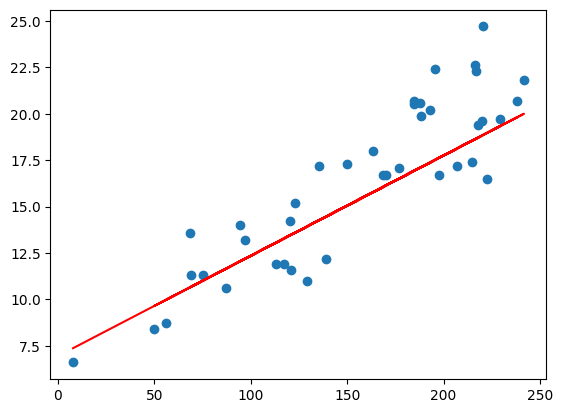

In [24]:
plt.scatter(X_test_lm, y_test_lm)
plt.plot(X_test_lm, 6.948 + 0.054 * X_test_lm, 'r')
plt.show()

The equationwe get is the same as what we got before!

$ Sales = 6.948 + 0.054* TV $

In [30]:
s = 6.948+(0.054 * 44)
s

9.324